In [46]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
!pip install opendatasets
!pip install pandas

In [48]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class")

Skipping, found downloaded files in ".\fruit-classification10-class" (use force=True to force download)


In [59]:
data_dir = "MY_data/train"
img_height, img_width = (256, 256)
batch_size = 32


In [60]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

NotFoundError: Could not find directory MY_data/train

In [61]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

NotFoundError: Could not find directory MY_data/train

In [39]:
class_names = train_ds.class_names
print(class_names)

NameError: name 'train_ds' is not defined

In [ ]:
im_shape = (256,256)
num_classes  = len(class_names)
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

NameError: name 'class_names' is not defined

In [ ]:
epochs = 80

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.keras',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_ds,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=val_ds,
        verbose = 1,
        )

NameError: name 'model' is not defined

In [42]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [43]:
from tensorflow.keras.models import load_model

model = load_model('model.keras')

ValueError: File not found: filepath=model.keras. Please ensure the file is an accessible `.keras` zip file.

In [44]:
def load_and_prep_image(filename, img_shape=256, scale=True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img


In [ ]:



import os
import random
import time
plt.figure(figsize=(17, 10))
class_name = random.choice(class_names)
filename = random.choice(os.listdir("/content/fruit-classification10-class/MY_data/test/"+ class_name))
print(filename)
filepath = "/content/fruit-classification10-class/MY_data/test"+'/'+class_name+'/'+filename
start_time = time.time()
img = load_and_prep_image(filepath, scale=False)
load_time = time.time() - start_time
img_expanded = tf.expand_dims(img, axis=0)
start_time = time.time()
pred_prob = model.predict(img_expanded)
predict_time = time.time() - start_time
pred_class = class_names[pred_prob.argmax()]
plt.subplot(1, 3, 1)
plt.imshow(img/225.)
if class_name == pred_class:
  title_color = "g"
else:
  title_color = "r"
plt.title(f"Actual: {class_name}, Pred: {pred_class}, Prob: {pred_prob.max():.2f}\nLoad time: {load_time:.2f}s, Predict time: {predict_time:.2f}s", c=title_color)
plt.axis(False);

NameError: name 'class_names' is not defined

<Figure size 1700x1000 with 0 Axes>

Skipping, found downloaded files in ".\fruit-classification10-class" (use force=True to force download)
Found 2301 files belonging to 10 classes.
Using 1841 files for training.
Found 2301 files belonging to 10 classes.
Using 460 files for validation.
['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']


c:\Users\b12b3\Desktop\ML\ML-Projects\Environments\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 20)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 40)   │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 625000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    62,500,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,508,910 (238.45 MB)

 Trainable params: 62,508,910 (238.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.1369 - loss: 3420.6494
Epoch 1: val_loss improved from inf to 2.27299, saving model to model.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 667ms/step - accuracy: 0.1372 - loss: 3383.1077 - val_accuracy: 0.1652 - val_loss: 2.2730
Epoch 2/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.3665 - loss: 1.9358
Epoch 2: val_loss did not improve from 2.27299
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 483ms/step - accuracy: 0.3672 - loss: 1.9340 - val_accuracy: 0.1935 - val_loss: 2.3218
Epoch 3/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.6727 - loss: 1.1329
Epoch 3: val_loss did not improve from 2.27299
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 475ms/step - accuracy: 0.6738 - loss: 1.1301 - val_accuracy: 0.2152 - val_loss: 3.1788
Epoch 4/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8710 - loss: 0.5124
Epoch 4: val_loss did not improve from 2.27299
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 467ms/step - accuracy: 0.8714 - loss: 0.5117 - v

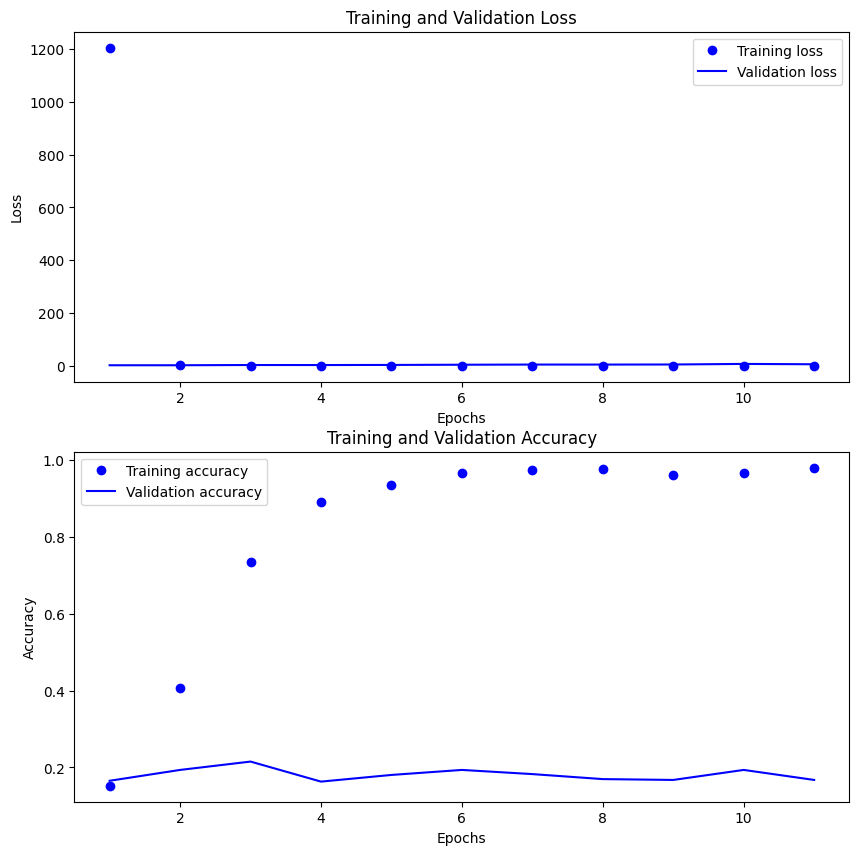

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'MY_data/test\\strawberries'

<Figure size 1700x1000 with 0 Axes>

In [63]:
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas
import os
import tensorflow as tf
import time

# Download the dataset
od.download("https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class")
data_dir = "MY_data/train"
img_height, img_width = (256, 256)
batch_size = 32

# Verify dataset path
assert os.path.exists(data_dir), f"Dataset path {data_dir} does not exist."

# Load training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Display class names
class_names = train_ds.class_names
print(class_names)

# Model parameters
im_shape = (256, 256)
num_classes = len(class_names)

# Define the model
model = Sequential([
    Conv2D(20, kernel_size=(3, 3), activation='relu', input_shape=(im_shape[0], im_shape[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(40, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model.summary()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Callbacks for saving the best model and early stopping
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.keras',
        monitor='val_loss', save_best_only=True, verbose=1
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
]

# Train the model
epochs = 80
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=val_ds,
    verbose=1
)

# Plot training and validation metrics
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs_x, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Load the best saved model
model = tf.keras.models.load_model('model.keras')

# Function to load and preprocess an image
def load_and_prep_image(filename, img_shape=256, scale=True):
    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img, channels=3)
    img = tf.image.resize(img, [img_shape, img_shape])
    if scale:
        return img / 255.
    else:
        return img

# Randomly test the model on a test image
plt.figure(figsize=(17, 10))
class_name = random.choice(class_names)
test_dir = "MY_data/test"
filename = random.choice(os.listdir(os.path.join(test_dir, class_name)))
filepath = os.path.join(test_dir, class_name, filename)

# Measure load time
start_time = time.time()
img = load_and_prep_image(filepath, scale=False)
load_time = time.time() - start_time

# Predict class
img_expanded = tf.expand_dims(img, axis=0)
start_time = time.time()
pred_prob = model.predict(img_expanded)
predict_time = time.time() - start_time
pred_class = class_names[pred_prob.argmax()]

# Display result
plt.subplot(1, 3, 1)
plt.imshow(img / 255.)
title_color = "g" if class_name == pred_class else "r"
plt.title(f"Actual: {class_name}, Pred: {pred_class}, Prob: {pred_prob.max():.2f}\n"
          f"Load time: {load_time:.2f}s, Predict time: {predict_time:.2f}s", c=title_color)
plt.axis(False)
plt.show()
